In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid debugL9306E:debugJT1KTE. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid debugPY9OXD:debugUAXWZ3. Status was 1.
Missing datastring for uid debugPY9OXE:debugUAXWZ3. Status was 1.


In [6]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [7]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [8]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [9]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [10]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,debugPY9OXC:debugUAXWZ3,0,0,debugUAXWZ3,debugPY9OXC,debugJNGIUQ,html-slider-response-with-copout,2743.1,0.0-3.0,2021-08-23 19:17:48.223,04_comprehension_swarm-full,...,<NA>,NaN,100.0,False,practice,solid,full,False,False,0.934678
4,debugPY9OXC:debugUAXWZ3,0,0,debugUAXWZ3,debugPY9OXC,debugJNGIUQ,html-slider-response-with-copout,3068.0,0.0-4.0,2021-08-23 19:17:51.296,04_comprehension_swarm-full,...,<NA>,NaN,100.0,False,practice,liquid,full,False,False,0.934678
5,debugPY9OXC:debugUAXWZ3,0,0,debugUAXWZ3,debugPY9OXC,debugJNGIUQ,html-slider-response-with-copout,3086.1,0.0-5.0,2021-08-23 19:17:54.386,04_comprehension_swarm-full,...,<NA>,NaN,0.0,False,practice,abstract,empty,False,False,-1.655482
6,debugPY9OXC:debugUAXWZ3,0,0,debugUAXWZ3,debugPY9OXC,debugJNGIUQ,html-slider-response-with-copout,2362.1,0.0-6.0,2021-08-23 19:17:56.753,04_comprehension_swarm-full,...,<NA>,NaN,0.0,False,practice,solid,empty,False,False,-1.655482
7,debugPY9OXC:debugUAXWZ3,0,0,debugUAXWZ3,debugPY9OXC,debugJNGIUQ,html-slider-response-with-copout,2141.6,0.0-7.0,2021-08-23 19:17:58.900,04_comprehension_swarm-full,...,<NA>,NaN,100.0,False,practice,abstract,full,False,False,0.934678


In [11]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [13]:
len(response_df.reset_index().uniqueid.unique())

1

### Demo

In [14]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

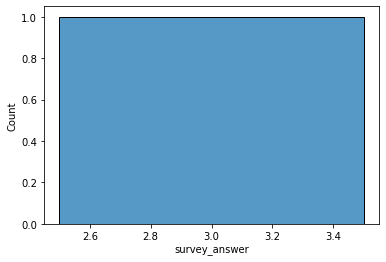

In [15]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [16]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Master's degree    1
Name: survey_answer, dtype: int64

In [17]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    1
Name: survey_answer, dtype: int64

### Comments

In [18]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid               
39           debugPY9OXC:debugUAXWZ3    thx
Name: survey_answer, dtype: object

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

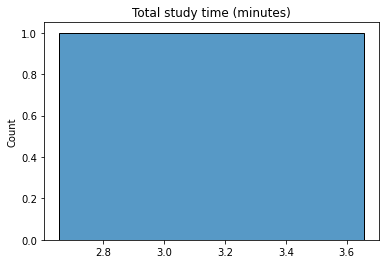

In [19]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [20]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    3.156127
std          NaN
Name: rt, dtype: float64

### Response times

In [21]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

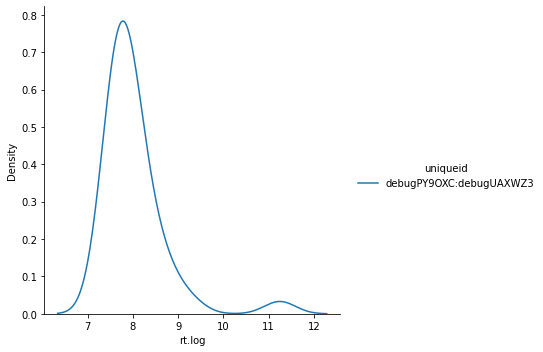

In [22]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

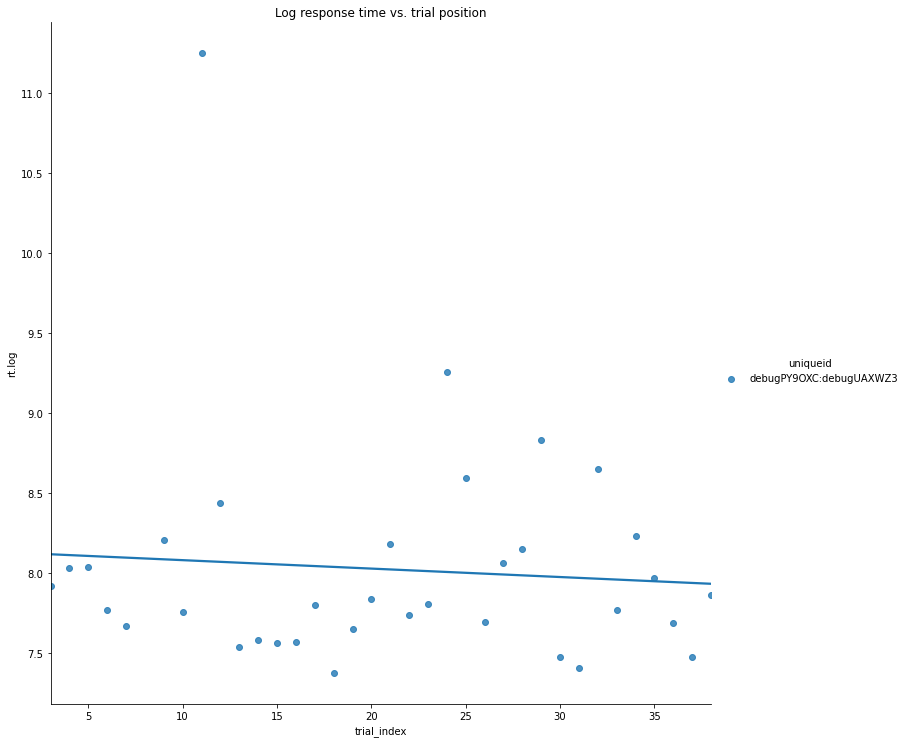

In [23]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

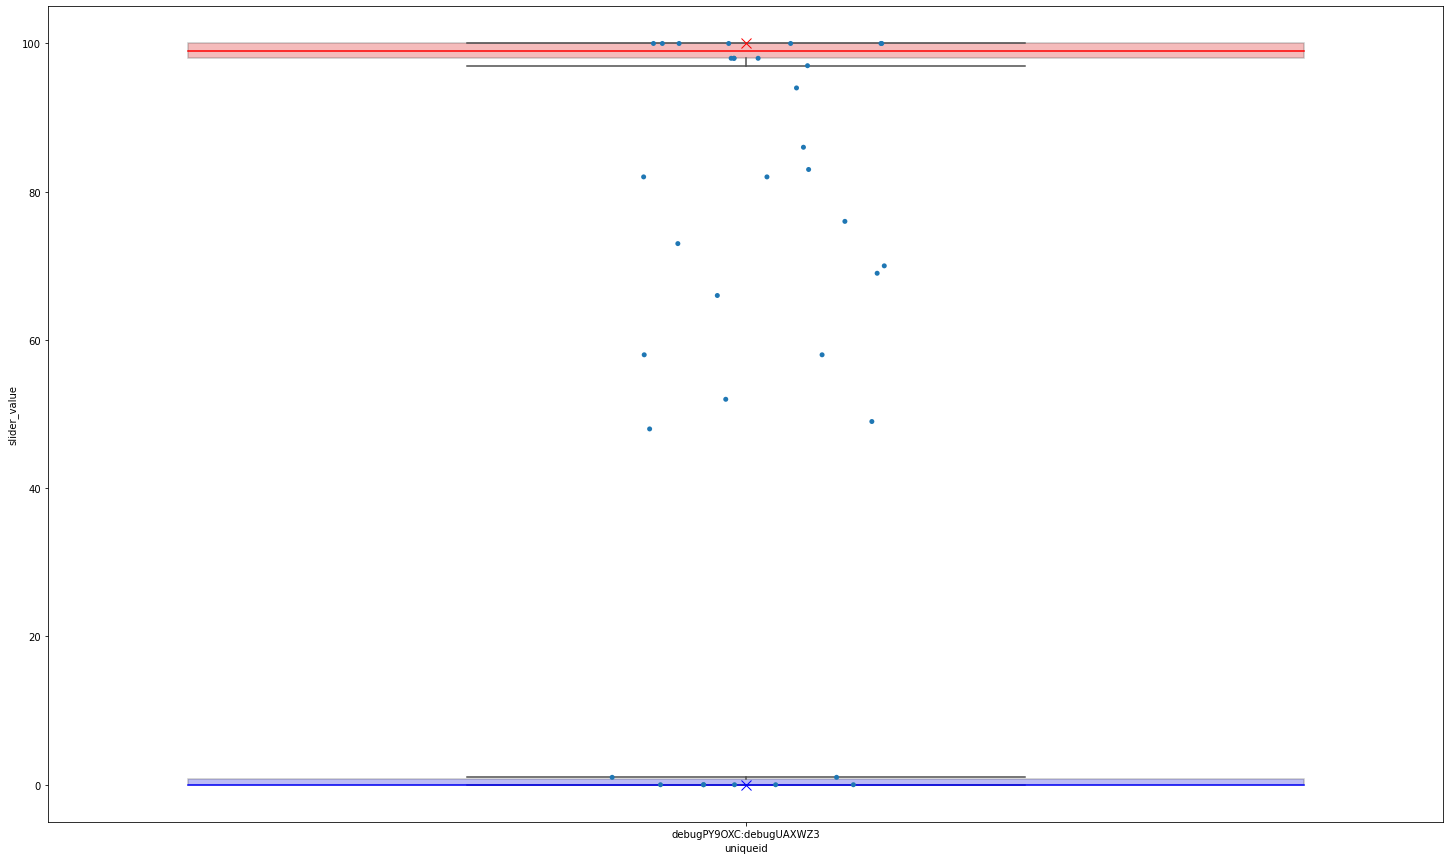

In [24]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='t'>

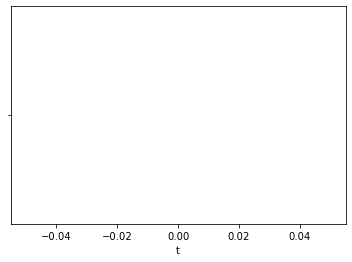

In [36]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    
    # Filter out copouts (and print warning -- practice should not trigger copout)
    copout_rows = practice_rows[practice_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {practice_rows.iloc[0].name} had {len(copout_rows)} practice copout(s). Seems fishy.")
    practice_rows = practice_rows[~practice_rows.slider_copout]
    
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.boxplot(data=practice_stats.reset_index(), x="t", hue="uniqueid")

In [37]:
practice_stats.sort_values("t")

,t,pval
uniqueid,,
debugPY9OXC:debugUAXWZ3,inf,0.0


#### Practice copouts

In [38]:
response_df[response_df.condition_0 == "practice"].groupby(["condition_1", "condition_2"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

mean  count
condition_1 condition_2              
abstract    empty        False      1
            full         False      1
liquid      full         False      1
solid       empty        False      1
            full         False      1

### Fillers

<AxesSubplot:xlabel='t'>

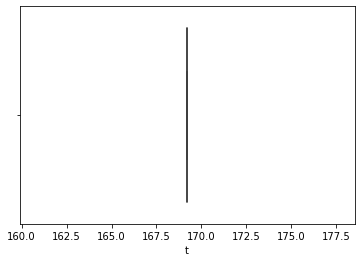

In [39]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [40]:
filler_stats.sort_values("t")

,t,pval
uniqueid,,
debugPY9OXC:debugUAXWZ3,169.202808,1.277408e-18


#### Filler copouts

In [41]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,,mean,count
item_id,condition_1,,
0.0,empty,False,1
1.0,empty,False,1
2.0,empty,False,1
3.0,empty,False,1
4.0,empty,False,1
5.0,empty,False,1
6.0,full,False,1
7.0,full,False,1
8.0,full,False,1


## Final data processing

In [42]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [43]:
practice_drops = practice_stats[(practice_stats.t < 0) | (practice_stats.pval > 1e-1) | practice_stats.t.isna()]
drop_pct = np.round(len(practice_drops) / len(practice_stats.index) * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

0 subjects (0.0%) disqualified and dropped due to failed practice.
	
0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	


In [44]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

1 subjects remaining.


### Merge in materials

In [45]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [46]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [47]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [48]:
merged_df.to_csv("merged_df.csv")

## Basic visualization

In [49]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

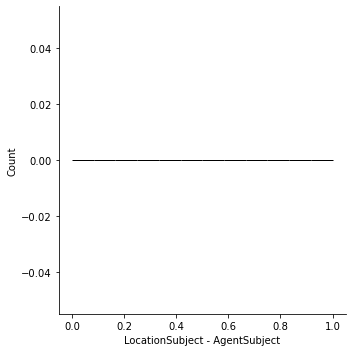

In [50]:
sns.displot(item_differences, bins=12)

In [51]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?
4.0      people        bustl    square      True         True           NaN
6.0      terror        cours    body        False        False          NaN
7.0      excitement    crackl   theater     False        False          NaN
8.0      cockroaches   creep    cave        True         True           NaN
17.0     debris        flow     river       True         False          NaN
18.0     birds         flutter  courtyard   True         True           NaN
19.0     bubbles       foam     tub         True         True           NaN
20.0     fireflies     glimmer  backyard    True         True           NaN
22.0     lights        glow     sky         True         True           NaN
24.0     frogs         hopp     swamp       True         True           NaN
25.0     energy        humm     market      False        False          NaN
30.0     fear          prickl   fingertips  False        False          NaN
31.0     excitemen

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'worms wriggl'),
  Text(1, 0, 'lights glow'),
  Text(2, 0, 'bubbles foam'),
  Text(3, 0, 'birds flutter'),
  Text(4, 0, 'fireflies glimmer'),
  Text(5, 0, 'people bustl'),
  Text(6, 0, 'frogs hopp'),
  Text(7, 0, 'debris flow'),
  Text(8, 0, 'excitement puls'),
  Text(9, 0, 'terror cours'),
  Text(10, 0, 'trepidation shak'),
  Text(11, 0, 'fear prickl'),
  Text(12, 0, 'sewage runn'),
  Text(13, 0, 'anticipation tingl'),
  Text(14, 0, 'excitement crackl'),
  Text(15, 0, 'tadpoles swimm'),
  Text(16, 0, 'energy humm'),
  Text(17, 0, 'cockroaches creep')])

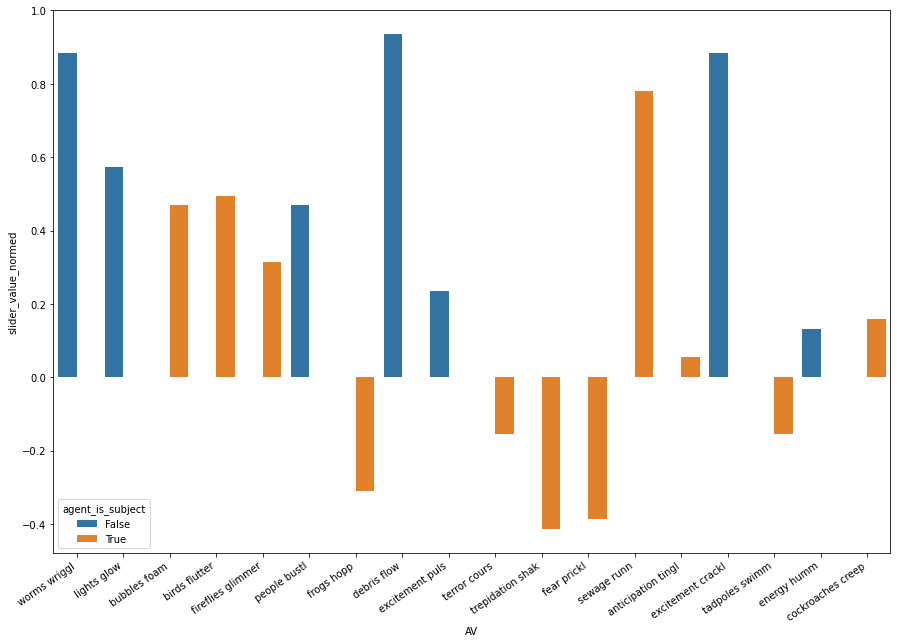

In [52]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

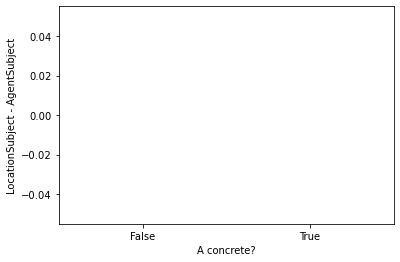

In [53]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

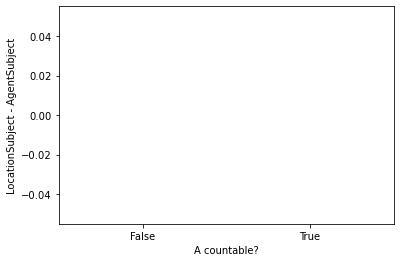

In [54]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [55]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.05, 0.95])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
item_bootstrap_df

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
item_bootstrap_df = \
    pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
             left_index=True, right_index=True).sort_values("low", ascending=False)

In [ ]:
item_bootstrap_df.sort_values("low", ascending=False)

In [ ]:
plt.subplots(figsize=(15, 15))
sns.barplot(
    data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
    x="AV", y="value", hue="variable")
plt.xticks(rotation=35, ha="right")

### Copouts

In [ ]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [ ]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

In [ ]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

In [ ]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

In [ ]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

### Item exposure

In [ ]:
merged_df.groupby(["item_id", "A", "agent_is_subject"]).size().sort_values()

## Extras

In [ ]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])